## Define the Task

The task is:

Make predictions about a country's life expectancy in years from a set of metrics for the country


## Import the Necessary Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Sklearn regression model evaluation function
from sklearn.metrics import mean_absolute_error

# Convenience functions.  This can be found on the course github
from functions import *

## collect data

In [2]:
# Load the data
dataset = pd.read_csv("world_data.csv")

In [3]:
# Examine the date shape
dataset.shape

(194, 17)

✔ Country

Nom du pays.

✔ Happiness

Niveau de bonheur

✔ Income

Revenu national par habitant

✔ Lifeexp

Espérance de vie ( target variable)

✔ Sanitation

Pourcentage de personnes ayant accès à des services sanitaires de base

✔ Water

Pourcentage de personnes ayant accès à une source d’eau

✔ Urbanpopulation

Part de la population vivant en zone urbaine.

✔ Unemployment

Pourcentage de la population enregistrée comme chômeurs de longue durée.

✔ Literacy

pourcentage d’adultes sachant lire et écrire simplement.

✔ Inequality

Inégalités de revenus (indice de Gini). Score élevé = plus d’inégalités.

✔ Murder

Taux de mortalité due à la violence interpersonnelle pour 100 000 habitants.

✔ Energy

Consommation d’énergie primaire

✔ Childmortality

Nombre de décès d’enfants de moins de 5 ans pour 1 000 naissances vivantes.

✔ Fertility

Taux de fécondité : nombre moyen d’enfants par femme.

✔ HIV

Nombre total de personnes vivant avec le VIH

✔ Foodsupply

Apport calorique alimentaire moyen disponible par personne.

✔ Populationtotal

Population totale du pays.

In [4]:
# Inspect first few rows
dataset.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


## clean data

In [5]:
# Check data types
dataset.dtypes

country             object
happiness          float64
income             float64
lifeexp            float64
sanitation         float64
water              float64
urbanpopulation    float64
unemployment       float64
literacy           float64
inequality         float64
murder             float64
energy             float64
childmortality     float64
fertility          float64
hiv                float64
foodsupply         float64
population           int64
dtype: object

In [6]:
# Check for nulls
dataset.isnull().mean().sort_values()

country            0.000000
sanitation         0.000000
water              0.000000
population         0.000000
childmortality     0.005155
income             0.005155
lifeexp            0.036082
fertility          0.051546
energy             0.128866
foodsupply         0.134021
inequality         0.175258
hiv                0.231959
literacy           0.231959
happiness          0.278351
urbanpopulation    0.386598
unemployment       0.422680
murder             0.520619
dtype: float64

In [ ]:
# Remove sparsely populated features (>35% missing)
dataset = dataset.drop(["murder","urbanpopulation","unemployment"], axis=1)

# Use median instead of mean for better robustness to outliers
from sklearn.impute import SimpleImputer

# Separate numeric columns
numeric_cols = dataset.select_dtypes(include=[np.number]).columns

#   
imputer = SimpleImputer(strategy='median')
dataset[numeric_cols] = imputer.fit_transform(dataset[numeric_cols])

In [8]:
dataset.isnull().mean()

country           0.0
happiness         0.0
income            0.0
lifeexp           0.0
sanitation        0.0
water             0.0
literacy          0.0
inequality        0.0
energy            0.0
childmortality    0.0
fertility         0.0
hiv               0.0
foodsupply        0.0
population        0.0
dtype: float64

## understand data

In [9]:
plt.style.use('bmh') #Bayesian Methods for Hackers

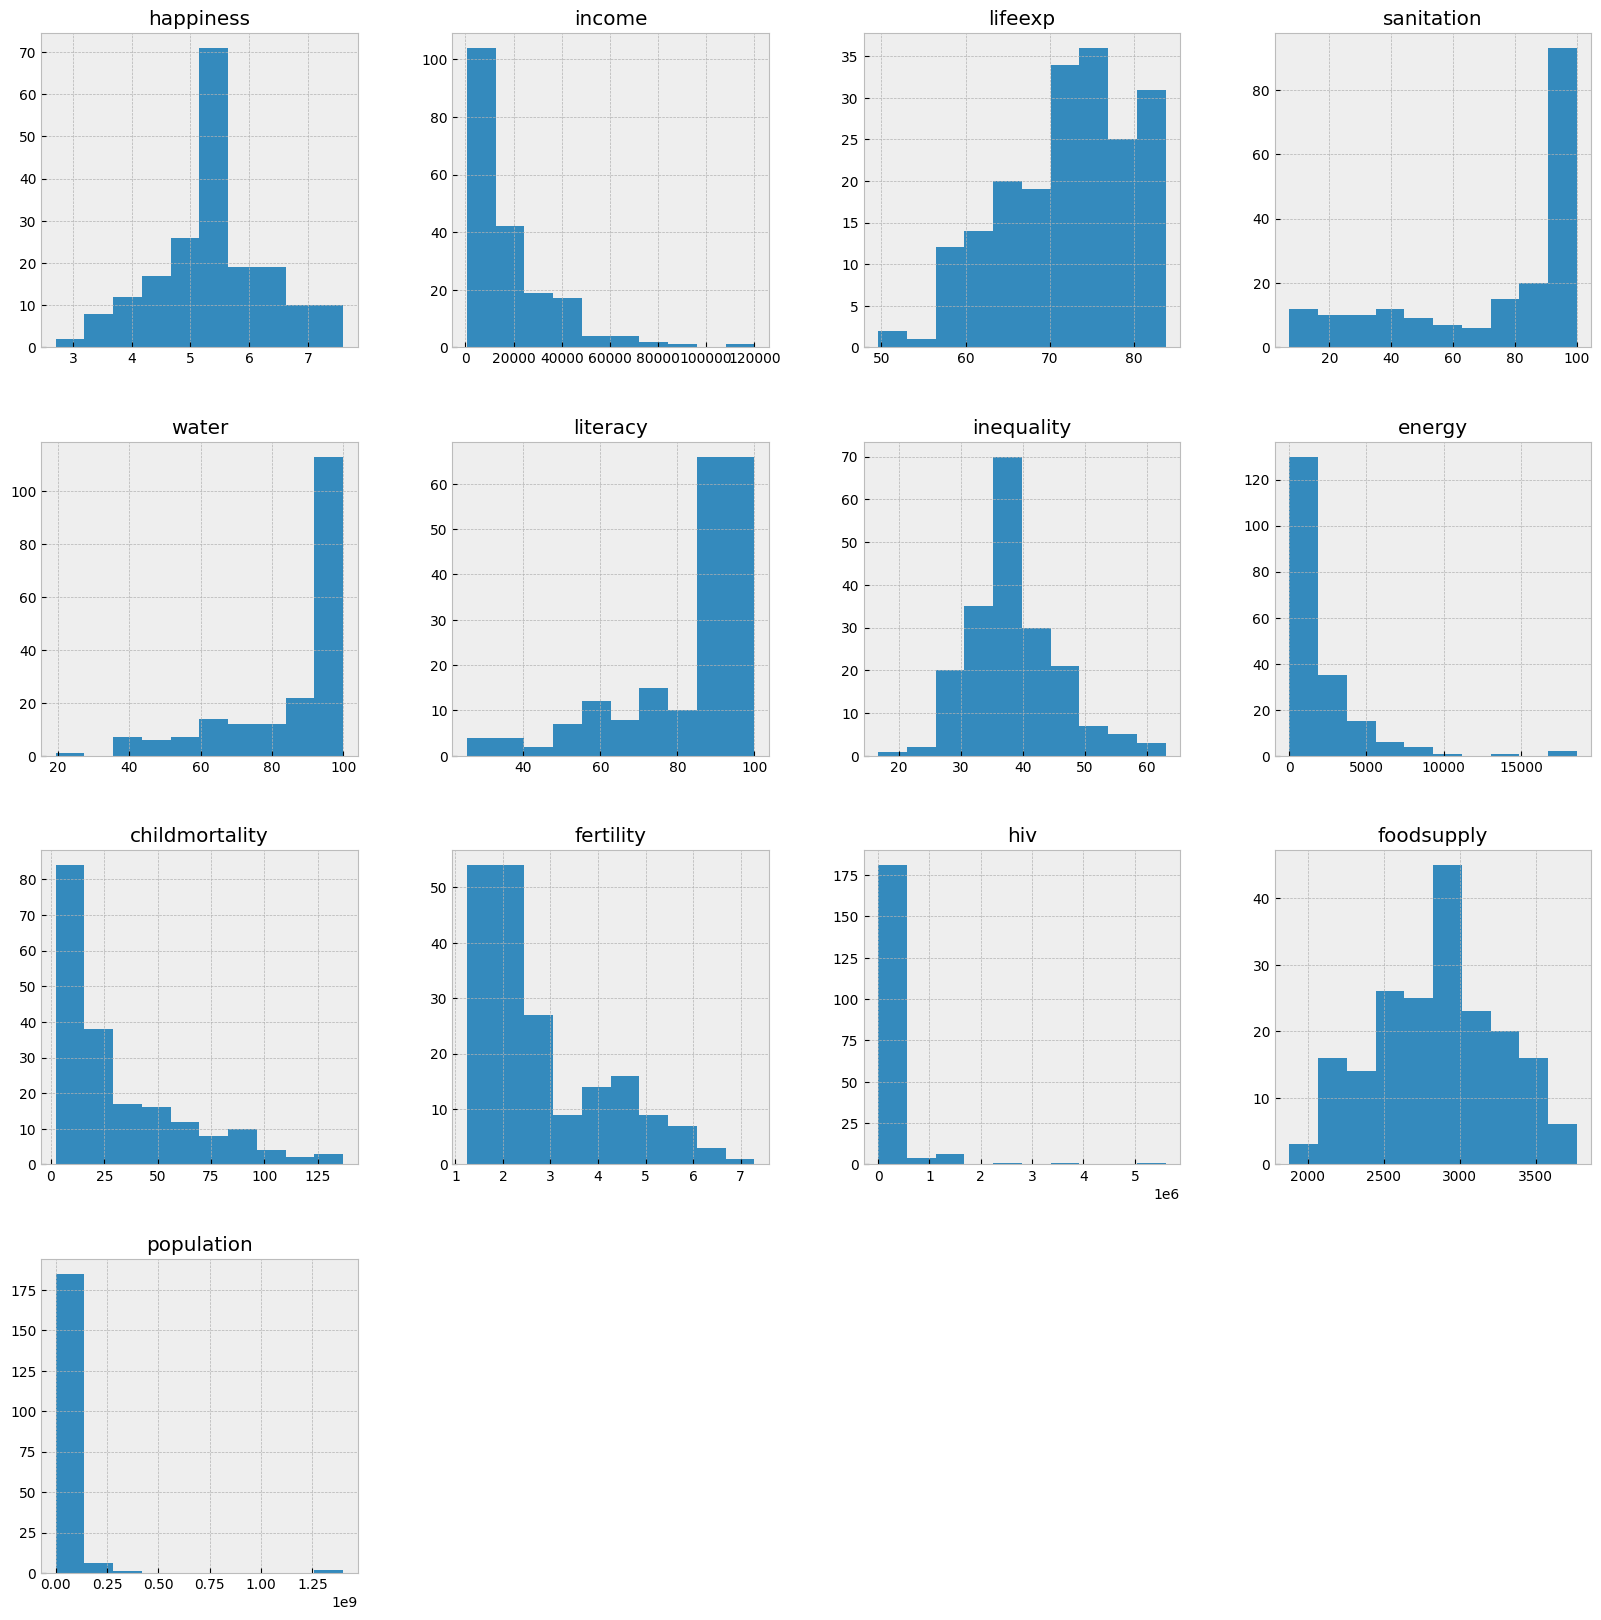

In [10]:
dataset.hist(figsize=(20,20))
plt.show()

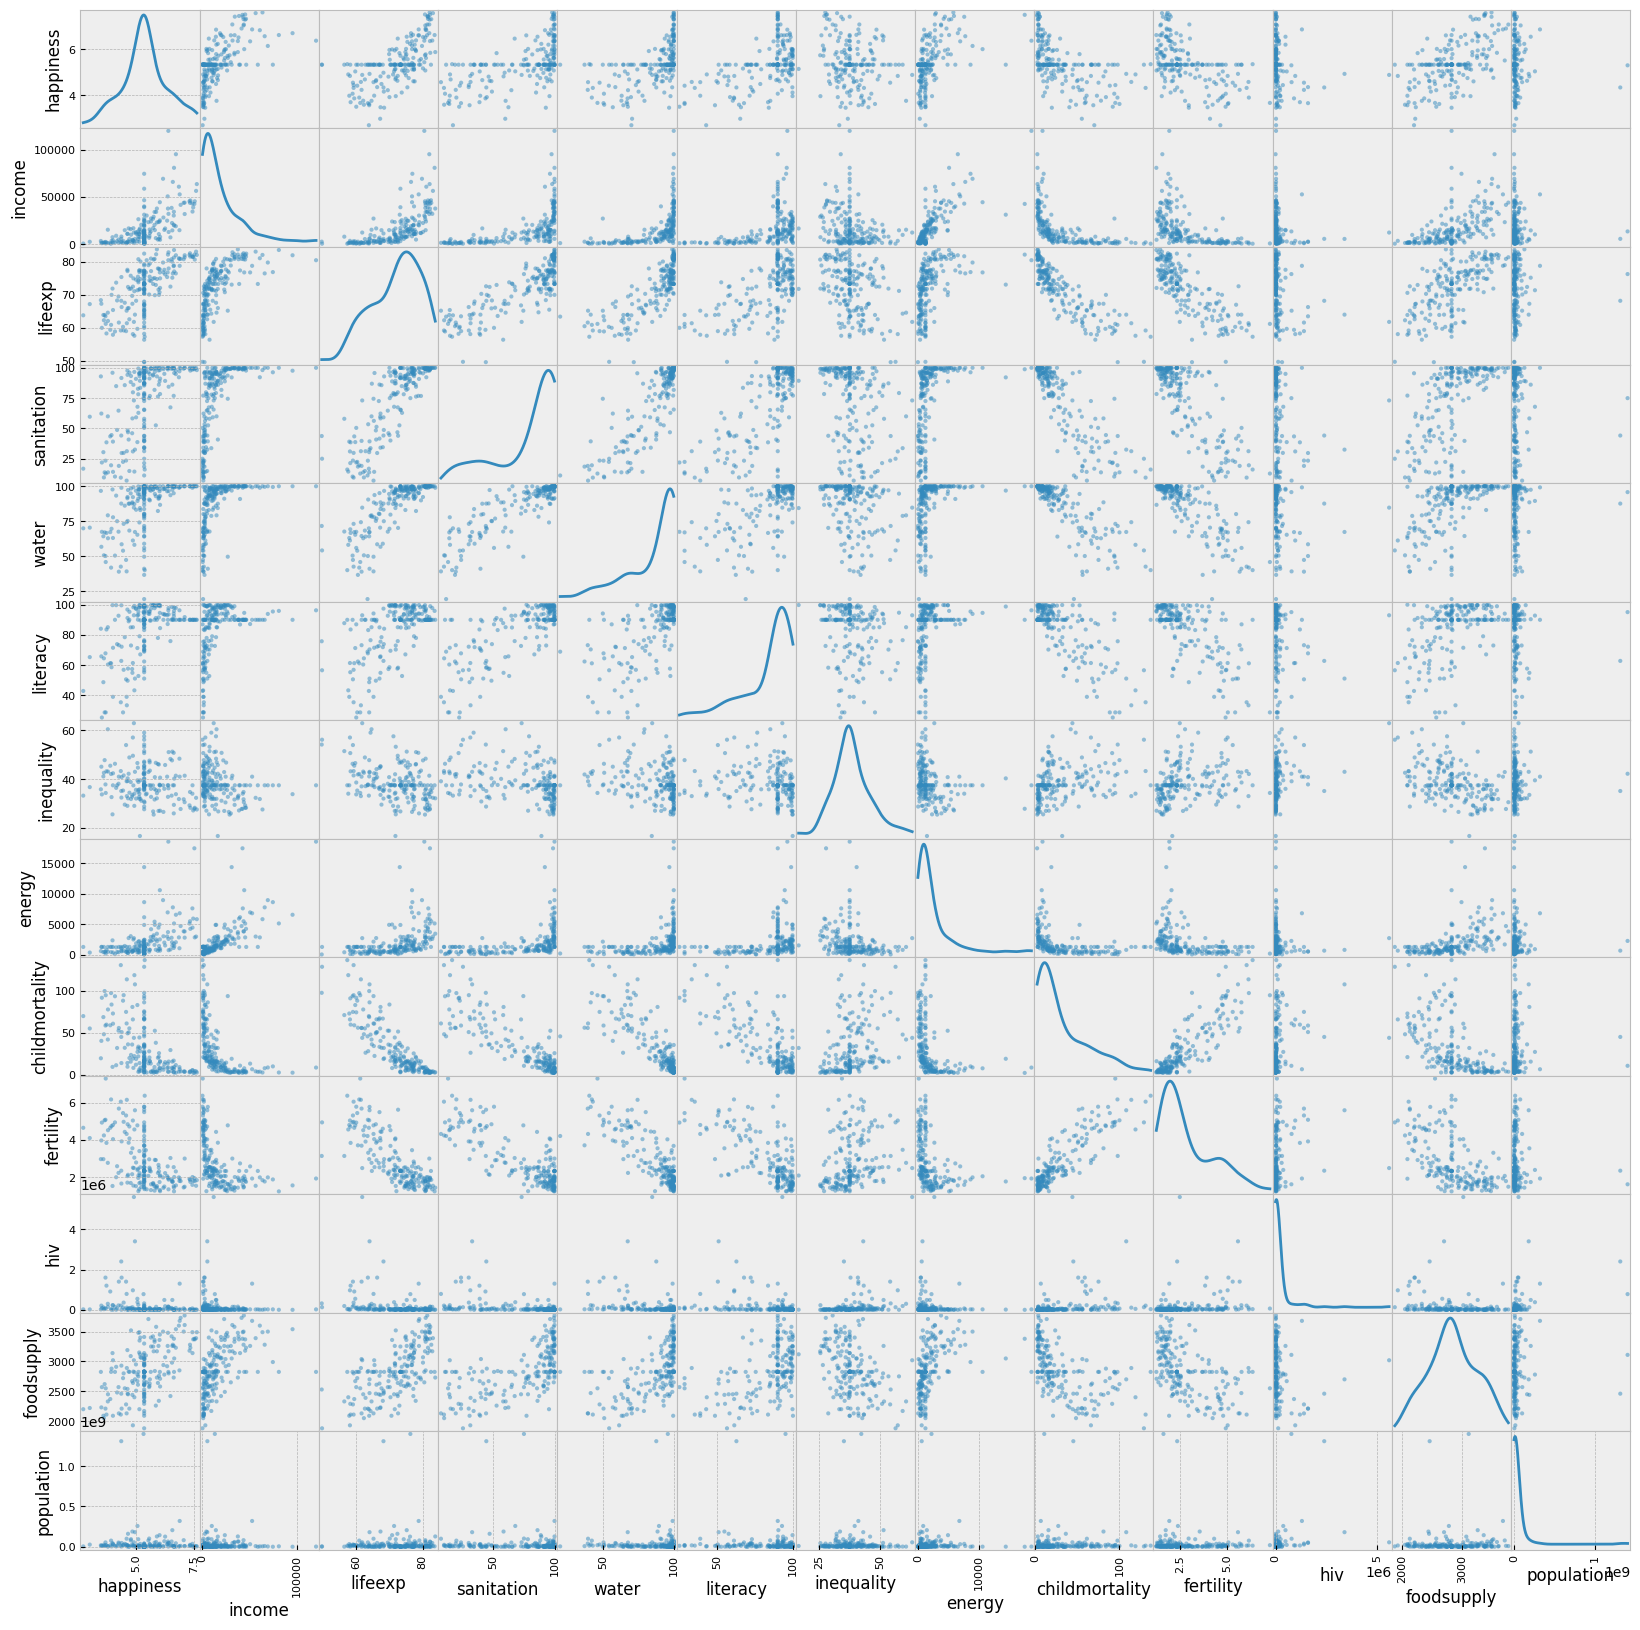

In [ ]:
scatterMatrix(dataset)

# sanitation fertility

## prepare data

In [12]:
y = dataset["lifeexp"]
X = dataset[['happiness', 'income', 'sanitation', 'water', 'literacy', 'inequality', 'energy', 'childmortality', 'fertility',  'hiv', 'foodsupply', 'population']]

In [ ]:
# Rescale the data (Normaliser)
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)

In [14]:
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Build model

In [ ]:



# Create models with better default parameters
models = [
    ('Linear Regression', LinearRegression()),
    ('KNN', KNeighborsRegressor(n_neighbors=7, weights='distance')),  #distance ponderer
    ('SVR', SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.1)),  # radial basis function kernel | C pour regularization | epsilon indice de tolearnce
    ('Decision Tree', DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=seed)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=5, random_state=seed)), # 1===> nombre de l arbre 
]

In [16]:
print("="*60)
print("TRAINING SET PERFORMANCE")
print("="*60)
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_train)
    mae = mean_absolute_error(Y_train, predictions)
    print(f"{name:25s} MAE: {mae:.4f}")

TRAINING SET PERFORMANCE
Linear Regression         MAE: 2.2587
KNN                       MAE: 0.0000
SVR                       MAE: 1.8460
Decision Tree             MAE: 0.3798
Random Forest             MAE: 1.0621


# evaluation

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

print("\n" + "="*60)
print("TEST SET PERFORMANCE")
print("="*60)
results = []
for name, model in models:
    predictions = model.predict(X_test)
    mae = mean_absolute_error(Y_test, predictions)
    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    r2 = r2_score(Y_test, predictions)
    results.append((name, mae, rmse, r2))
    print(f"{name:25s} MAE: {mae:.4f}  RMSE: {rmse:.4f}  R²: {r2:.4f}")

# Find best model
best_model_idx = min(range(len(results)), key=lambda i: results[i][1])
print(f"\n{'='*60}")
print(f"BEST MODEL: {results[best_model_idx][0]} with MAE = {results[best_model_idx][1]:.4f}")
print(f"{'='*60}")


TEST SET PERFORMANCE
Linear Regression         MAE: 2.4421  RMSE: 3.0159  R²: 0.8119
KNN                       MAE: 2.4431  RMSE: 3.1542  R²: 0.7942
SVR                       MAE: 2.4467  RMSE: 3.0589  R²: 0.8064
Decision Tree             MAE: 2.9859  RMSE: 3.9830  R²: 0.6718
Random Forest             MAE: 2.1380  RMSE: 2.8831  R²: 0.8281

BEST MODEL: Random Forest with MAE = 2.1380


## Cross-Validation for Better Evaluation

In [18]:
from sklearn.model_selection import cross_val_score

print("\n" + "="*60)
print("CROSS-VALIDATION PERFORMANCE (5-Fold)")
print("="*60)

for name, model in models:
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    cv_mae = -cv_scores.mean()
    cv_std = cv_scores.std()
    print(f"{name:25s} CV MAE: {cv_mae:.4f} (+/- {cv_std:.4f})")


CROSS-VALIDATION PERFORMANCE (5-Fold)
Linear Regression         CV MAE: 2.5319 (+/- 0.6199)
KNN                       CV MAE: 2.6208 (+/- 0.6890)
SVR                       CV MAE: 2.5765 (+/- 0.6017)
Decision Tree             CV MAE: 3.6756 (+/- 1.2137)
Random Forest             CV MAE: 2.5818 (+/- 0.8148)


## Feature Importance Analysis


FEATURE IMPORTANCE (Random Forest)
           feature  importance
7   childmortality    0.349689
2       sanitation    0.236261
3            water    0.207275
1           income    0.054820
8        fertility    0.046833
5       inequality    0.023923
11      population    0.019750
0        happiness    0.016066
6           energy    0.012995
10      foodsupply    0.012552
4         literacy    0.010261
9              hiv    0.009574


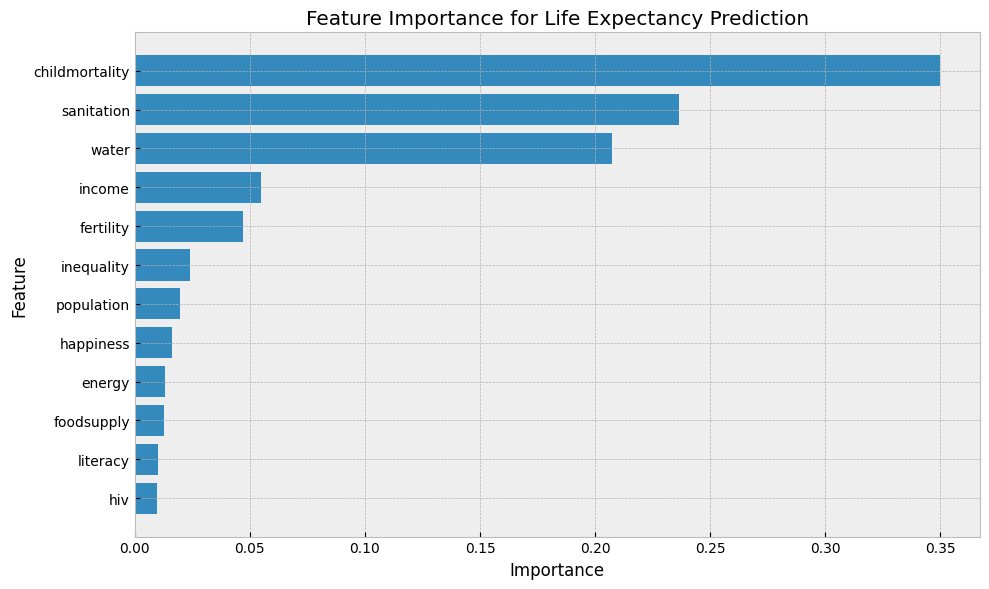

In [19]:
# Train Random Forest to get feature importance
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=seed)
rf_model.fit(X_train, Y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*60)
print("FEATURE IMPORTANCE (Random Forest)")
print("="*60)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Life Expectancy Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Hyperparameter Tuning for Best Models

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
print("Tuning Random Forest Hyperparameters...")
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=seed),
    param_grid_rf,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, Y_train)

print(f"\nBest Random Forest Parameters: {grid_rf.best_params_}")
print(f"Best CV MAE: {-grid_rf.best_score_:.4f}")

# Test the tuned model
rf_tuned_predictions = grid_rf.predict(X_test)
rf_tuned_mae = mean_absolute_error(Y_test, rf_tuned_predictions)
rf_tuned_r2 = r2_score(Y_test, rf_tuned_predictions)
print(f"Test MAE: {rf_tuned_mae:.4f}")
print(f"Test R²: {rf_tuned_r2:.4f}")

Tuning Random Forest Hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV MAE: 2.5013
Test MAE: 2.1892
Test R²: 0.8271


## Final Model Comparison


FINAL MODEL COMPARISON (sorted by MAE)
                Model      MAE       R²
        Random Forest 2.138040 0.828053
Random Forest (Tuned) 2.189244 0.827051
    Linear Regression 2.442075 0.811852
                  KNN 2.443077 0.794197
                  SVR 2.446675 0.806449
        Decision Tree 2.985897 0.671826


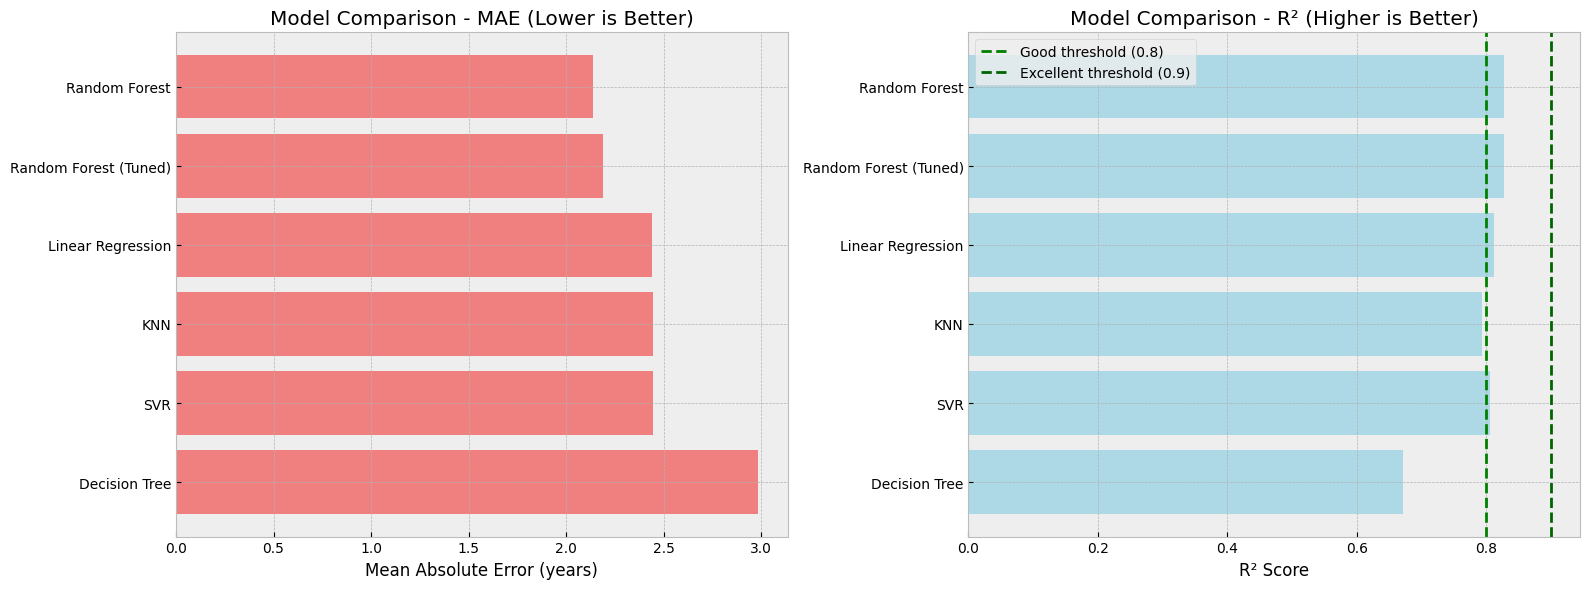


BEST MODEL: Random Forest
MAE: 2.1380 years
R² Score: 0.8281


In [21]:
# Compare all models including tuned versions
final_results = []

# Original models
for name, model in models:
    predictions = model.predict(X_test)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    final_results.append((name, mae, r2))

# Tuned models
final_results.append(('Random Forest (Tuned)', rf_tuned_mae, rf_tuned_r2))

# Create comparison dataframe
comparison_df = pd.DataFrame(final_results, columns=['Model', 'MAE', 'R²'])
comparison_df = comparison_df.sort_values('MAE')

print("\n" + "="*70)
print("FINAL MODEL COMPARISON (sorted by MAE)")
print("="*70)
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# MAE comparison
ax1.barh(comparison_df['Model'], comparison_df['MAE'], color='lightcoral')
ax1.set_xlabel('Mean Absolute Error (years)')
ax1.set_title('Model Comparison - MAE (Lower is Better)')
ax1.invert_yaxis()

# R² comparison
ax2.barh(comparison_df['Model'], comparison_df['R²'], color='lightblue')
ax2.set_xlabel('R² Score')
ax2.set_title('Model Comparison - R² (Higher is Better)')
ax2.axvline(x=0.8, color='green', linestyle='--', label='Good threshold (0.8)')
ax2.axvline(x=0.9, color='darkgreen', linestyle='--', label='Excellent threshold (0.9)')
ax2.legend()
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"BEST MODEL: {comparison_df.iloc[0]['Model']}")
print(f"MAE: {comparison_df.iloc[0]['MAE']:.4f} years")
print(f"R² Score: {comparison_df.iloc[0]['R²']:.4f}")
print(f"{'='*70}")